[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

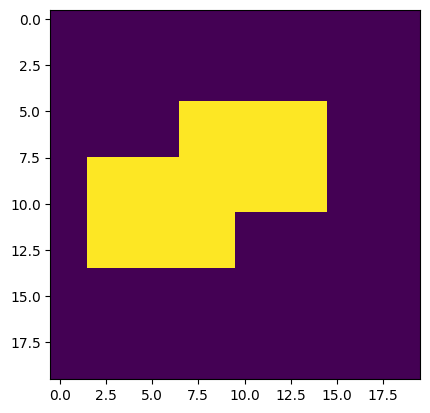

In [166]:
import math
import numpy as np
import matplotlib.pyplot as plt

img_array = plt.imread('roof_1.png')
techo = []
for fila in img_array:
    tmp = []
    for col in fila:
        tmp.append(col[0])
    techo.append(tmp)
    

techo = np.array(techo).reshape(20,20)

plt.imshow(techo, )
print(techo)


In [167]:
## Si el techo es rectangular y los paneles son todos del mismo tamaño, la cantidad
## de paneles solo depende del area disponible 


def generar_techo(panel_width: int, panel_height: int, ):
    return np.zeros((panel_width,panel_height))

n_paneles = 0
def colocar_panel(techo : np.ndarray, panel_width, panel_height, start_x = 0, start_y = 0, panel_ind=0) :
    tmp = techo.copy()

    for i in range(panel_width):
        for j in range(panel_height):
            if tmp[start_x + i,start_y + j] >= 1:
                #print('panel superpuesto con otro')
                raise Exception

            tmp[start_x + i,start_y + j] = 1 + panel_ind
            


    return tmp

def calculate_panels(panel_width: int, panel_height: int, 
                    roof_width: int, roof_height: int) -> int:
    
    
    # Primero chequeo si el panel cabe en el techo al menos 1 vez probando el panel en ambos sentidos
    a = math.floor(roof_width/panel_width)
    b = math.floor(roof_width/panel_height)
    if a == 0 and b == 0:
        # si el panel no cabe a lo ancho en ninguno de los sentidos no cabe
        # print('no cabe')
        return 0

    c = math.floor(roof_height/panel_width)
    d = math.floor(roof_height/panel_height)
    if c == 0 and d == 0:
        # si el panel no cabe a lo largo en ninguno de los sentidos no cabe
        # print('no cabe')
        return 0

    techo = generar_techo(roof_width,roof_height)
    n = 0

    for i in range(roof_width):
        for j in range(roof_height):

            try:
                techo = colocar_panel(techo, panel_width, panel_height,  i*panel_width, j*panel_height, n)
                n+=1
            except:
                try:
                    techo = colocar_panel(techo, panel_height, panel_width,  i*panel_width, j*panel_height, n)
                    n += 1
                except:
                    pass
            


    return n

r1 = calculate_panels(1,2,2,4)
r2 = calculate_panels(1,2,3,5)
r3 = calculate_panels(2,2,1,10)
r4 = calculate_panels(2,4,6,3)


print( r1, r2, r3, r4)

4 7 0 1


30


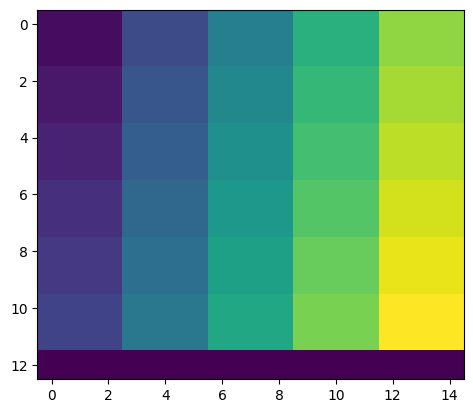

In [ ]:
techo_w, techo_h = 15,13

techo = generar_techo(techo_w,techo_h)
panel_w, panel_h = 3,2

a = math.floor(techo_w/panel_w)
b = math.floor(techo_w/panel_h)
c = math.floor(techo_h/panel_w)
d = math.floor(techo_h/panel_h)


n = 0

for i in range(techo_w):
    for j in range(techo_h):

        try:
            techo = colocar_panel(techo, panel_w, panel_h,  i*panel_w, j*panel_h, n)
            n+=1
        except:
            try:
                techo = colocar_panel(techo, panel_h, panel_w,  i*panel_w, j*panel_h, n)
                n += 1
            except:
                pass
            


techo
print('Cantidad de paneles totales: ', n)
plt.imshow(techo.T)